## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

education = pd.read_csv('./사교육비조사.csv', encoding = 'CP949')
education.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [2]:
education.info

<bound method DataFrame.info of        지역구분코드  행정구역시도코드  학교급구분코드  방과후학교참여여부  방과후학교참여시간수  EBS교재비  사교육참여시간수  \
0           1        11        1          1    0.333333     0.0  6.333333   
1           1        11        1          1    0.666667     0.0  0.000000   
2           1        11        1          1    0.666667     0.0  0.000000   
3           1        11        1          1    0.666667     0.0  0.000000   
4           1        11        1          1    0.666667     0.0  1.000000   
...       ...       ...      ...        ...         ...     ...       ...   
75780       4        39        4          2    0.000000     0.0  0.000000   
75781       4        39        4          2    0.000000     0.0  0.000000   
75782       4        39        4          2    0.000000     0.0  1.000000   
75783       4        39        4          2    0.000000     0.0  5.000000   
75784       4        39        4          2    0.000000     0.0  5.000000   

       일반교과사교육시간수  예체능사교육시간수     사교육비총비용  총

1.2 데이터의 기술통계량을 출력하세요.

In [3]:
education.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [29]:
education = education[education['학교급구분코드'] == 3]
len(education)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,...,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,상위,중위,하위
4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,low,...,71.0,61.0,2.0,4,NaN,True,False,True,False,False
4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,low,...,51.0,51.0,3.0,6,NaN,True,False,False,True,False
4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,low,...,31.0,41.0,3.0,4,NaN,True,False,False,False,True
4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,low,...,51.0,51.0,3.0,1,NaN,True,False,False,False,True
4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,middle,...,71.0,62.0,1.0,8,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,low,...,51.0,31.0,3.0,4,NaN,False,True,False,False,True
75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,low,...,41.0,31.0,3.0,6,NaN,False,True,False,False,True
75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,low,...,51.0,51.0,3.0,8,NaN,False,True,False,False,True
75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,low,...,51.0,63.0,3.0,5,NaN,False,True,True,False,False


In [28]:
education.drop('학교급구분코드', axis = 1)

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,상위,중위,하위
4920,1,11,1,0.333333,0.000000,0.0,0.0,0.0,low,1,71.0,61.0,2.0,4,NaN,True,False,True,False,False
4921,1,11,1,0.333333,0.000000,0.0,0.0,0.0,low,2,51.0,51.0,3.0,6,NaN,True,False,False,True,False
4922,1,11,1,0.333333,0.000000,0.0,0.0,0.0,low,2,31.0,41.0,3.0,4,NaN,True,False,False,False,True
4923,1,11,1,0.333333,0.000000,0.0,0.0,0.0,low,2,51.0,51.0,3.0,1,NaN,True,False,False,False,True
4924,1,11,1,0.333333,0.000000,12.0,12.0,0.0,middle,2,71.0,62.0,1.0,8,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,2,0.000000,21.652747,0.0,0.0,0.0,low,1,51.0,31.0,3.0,4,NaN,False,True,False,False,True
75679,4,39,2,0.000000,3.936863,0.0,0.0,0.0,low,4,41.0,31.0,3.0,6,NaN,False,True,False,False,True
75680,4,39,2,0.000000,3.936863,0.0,0.0,0.0,low,3,51.0,51.0,3.0,8,NaN,False,True,False,False,True
75681,4,39,2,0.000000,7.873726,0.0,0.0,0.0,low,2,51.0,63.0,3.0,5,NaN,False,True,True,False,False


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [6]:
education.drop(columns = ['지역구분코드', '행정구역시도코드'])

,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [7]:
education['방과후학교참여여부'].value_counts()

방과후학교참여여부
1    18498
2    11554
Name: count, dtype: int64

In [8]:
afterschool = pd.get_dummies(education['방과후학교참여여부'])
afterschool.columns = ['참여', '미참여']
education = pd.concat([education, afterschool], axis = 1)
education

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,True,False
4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,True,False
4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,True,False
4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,True,False
4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,False,True
75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,False,True
75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,False,True
75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,False,True


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [9]:
education.drop(columns = ['EBS교재비'])

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,1,11,3,1,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,True,False
4921,1,11,3,1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,True,False
4922,1,11,3,1,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,True,False
4923,1,11,3,1,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,True,False
4924,1,11,3,1,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,False,True
75679,4,39,3,2,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,False,True
75680,4,39,3,2,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,False,True
75681,4,39,3,2,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,False,True


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

<Axes: xlabel='학생성적구분코드', ylabel='사교육비총비용'>

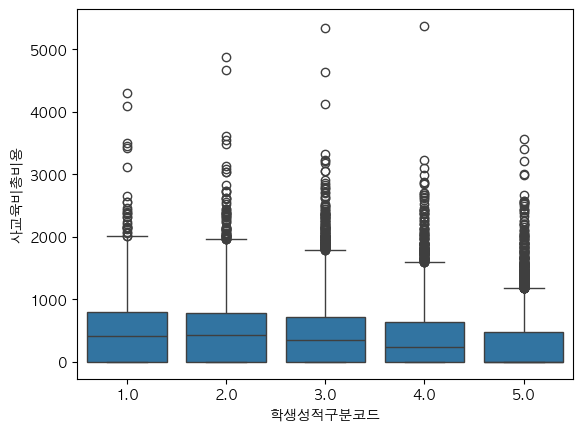

In [10]:
plt.rcParams["font.family"] = 'AppleGothic'
sns.boxplot(education, x = '학생성적구분코드', y = '사교육비총비용')

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [11]:
education['학생성적구분코드'] = education['학생성적구분코드'].replace({1: '상위', 2: '상위', 3: '중위', 4: '하위', 5:'하위'})
grade = pd.get_dummies(education['학생성적구분코드'])
education = pd.concat([education, grade], axis = 1)
education = education.drop(columns = ['학생성적구분코드'])
education

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,...,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,상위,중위,하위
4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,...,71.0,61.0,2.0,4,NaN,True,False,True,False,False
4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,...,51.0,51.0,3.0,6,NaN,True,False,False,True,False
4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,...,31.0,41.0,3.0,4,NaN,True,False,False,False,True
4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,...,51.0,51.0,3.0,1,NaN,True,False,False,False,True
4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,...,71.0,62.0,1.0,8,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,...,51.0,31.0,3.0,4,NaN,False,True,False,False,True
75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,...,41.0,31.0,3.0,6,NaN,False,True,False,False,True
75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,...,51.0,51.0,3.0,8,NaN,False,True,False,False,True
75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,...,51.0,63.0,3.0,5,NaN,False,True,True,False,False


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: Label Encoding은 각 카테고리의 값들을 0, 1, 2 등의 숫자로 바꾸는 것이다.
   One Hot Encoding은 각 카테고리의 값들에 대해 새로운 열을 생성하고 새로운 열에 해당하는 값인 경우 1, 해당하지 않는 값인 경우 0으로 채우는 것이다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [12]:
education.drop(columns = ['미참여', '하위'])

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,상위,중위
4920,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,True,True,False
4921,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,True,False,True
4922,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,True,False,False
4923,1,11,3,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,True,False,False
4924,1,11,3,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,3,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,False,False,False
75679,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,False,False,False
75680,4,39,3,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,False,False,False
75681,4,39,3,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,False,True,False


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A: 다중공선성이란 독립변수들 간에 상관관계가 존재하는 것으로 보통 VIF(분산팽창요인)이 10 이상일 때 다중공선성이 존재한다고 본다.
   One Hot Encoding을 해 새로 생성된 변수들은 상관 관계가 있을 수 있다. 따라서 전체 dummy variable이 중 하나의 값을 없애 다중공선성 문제를 해결한다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [13]:
edu_cor = education[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']].corr()
edu_cor = round(edu_cor, 2)

<Axes: >

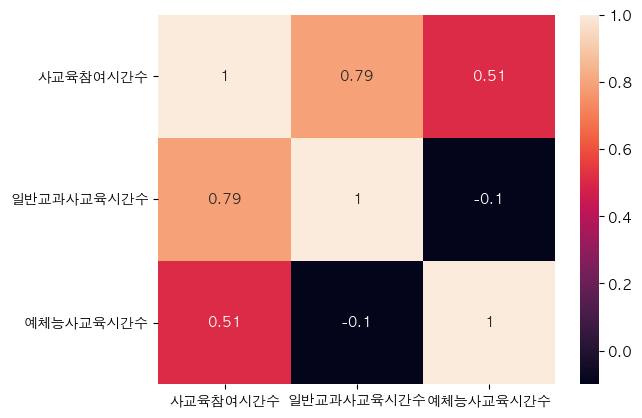

In [14]:
sns.heatmap(edu_cor,
            annot = True)

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [15]:
education['사교육비총비용'].value_counts(normalize = True)

사교육비총비용
0.000000       0.371090
356.578247     0.015673
354.117126     0.014907
475.437662     0.014741
713.156493     0.014175
                 ...   
566.959412     0.000033
949.033899     0.000033
703.536688     0.000033
2305.872661    0.000033
112.500000     0.000033
Name: proportion, Length: 2969, dtype: float64

In [16]:
education['사교육비총비용'] = pd.cut(education['사교육비총비용'], bins = 5).astype(str)
education['사교육비총비용'] = np.where(education['사교육비총비용'] == '(-5.374, 1074.831]', 'low',
                          np.where(education['사교육비총비용'] == '(1074.831, 2149.663]', 'middle-low',
                          np.where(education['사교육비총비용'] == '(2149.663, 3224.494]', 'middle',
                          np.where(education['사교육비총비용'] == '(3224.494, 4299.325]', 'mid-upper', 'high'))))

In [17]:
from sklearn.model_selection import train_test_split
edu_train, edu_test = train_test_split(education, 
                                       test_size = 0.3,
                                       stratify = education['사교육비총비용'],
                                       random_state = 1234)

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

3.1.1 의사결정나무모델

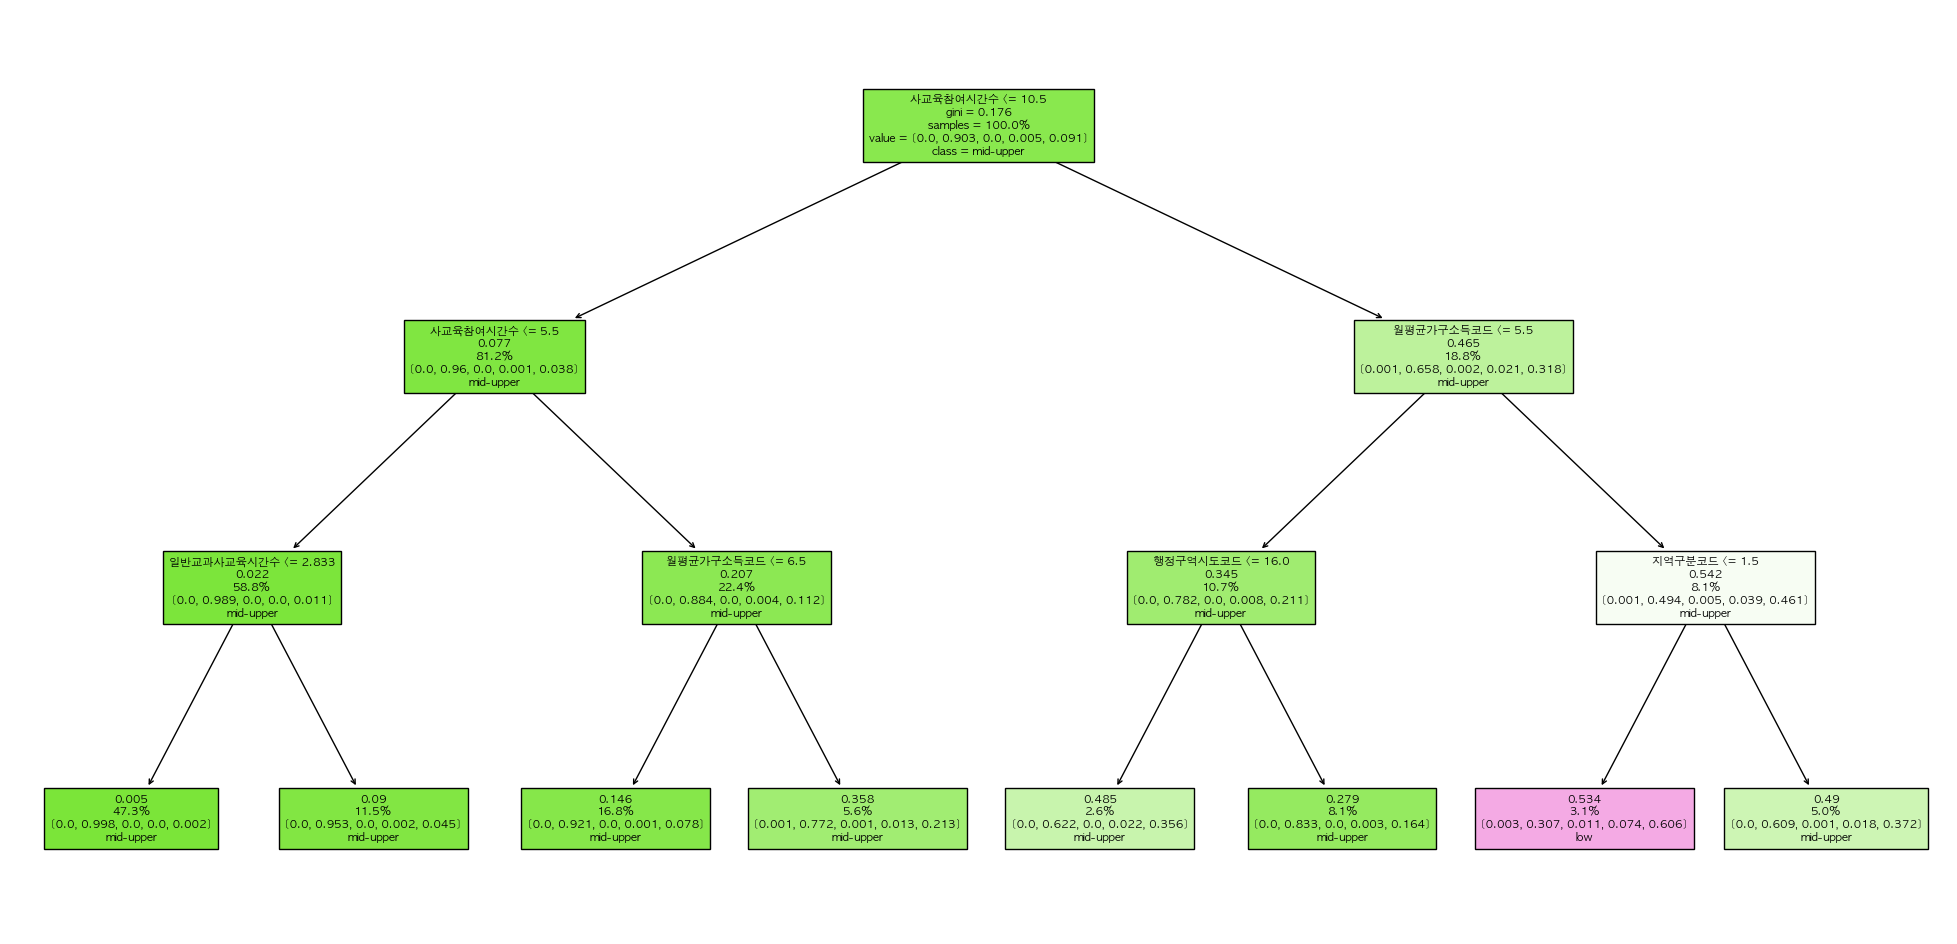

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 3)
train_x = edu_train.drop(columns = '사교육비총비용')
train_y = edu_train['사교육비총비용']
edu_model = clf.fit(X = train_x, y = train_y)
plt.figure(figsize = (25, 12))
tree.plot_tree(edu_model,
               feature_names = train_x.columns,
               class_names = ['high', 'mid-upper', 'middle', 'middle-low', 'low'],
               proportion = True,
               fontsize = 8,
               label = 'root',
               filled = True);

In [19]:
test_x = edu_test.drop(columns = '사교육비총비용')
test_y = edu_test['사교육비총비용']

In [20]:
edu_test['pred'] = edu_model.predict(test_x)
edu_test

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,...,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,상위,중위,하위,pred
18207,2,22,3,2,0.000000,0.000000,5.666667,0.000000,5.666667,low,...,51.0,3.0,3,NaN,False,True,False,False,True,low
39848,3,31,3,2,0.000000,0.000000,0.000000,0.000000,0.000000,low,...,54.0,3.0,4,NaN,False,True,False,False,True,low
63096,4,31,3,2,0.000000,0.000000,0.000000,0.000000,0.000000,low,...,31.0,2.0,1,NaN,False,True,False,True,False,low
32790,2,26,3,1,4.000000,19.826006,0.666667,0.666667,0.000000,low,...,61.0,1.0,2,NaN,True,False,False,False,True,low
7828,1,11,3,2,0.000000,0.000000,20.000000,0.000000,20.000000,low,...,41.0,3.0,5,NaN,False,True,False,False,True,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74347,4,38,3,1,3.000000,19.684315,0.000000,0.000000,0.000000,low,...,31.0,3.0,5,NaN,True,False,True,False,False,low
44948,3,33,3,1,2.666667,0.000000,0.000000,0.000000,0.000000,low,...,31.0,3.0,6,NaN,True,False,False,True,False,low
41475,3,31,3,2,0.000000,8.326923,17.000000,13.000000,4.000000,middle-low,...,41.0,3.0,4,NaN,False,True,False,False,True,low
34869,3,29,3,2,0.000000,0.000000,0.000000,0.000000,0.000000,low,...,61.0,3.0,1,NaN,False,True,False,False,True,low


3.1.2 target variable 예측

In [21]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = edu_test['사교육비총비용'],
                            y_pred = edu_test['pred'],
                            labels = ['high', 'mid-upper', 'middle', 'middle-low', 'low'])
conf_mat

array([[   0,    0,    0,    1,    1],
       [   0,    0,    0,    4,    0],
       [   0,    0,    0,   28,   18],
       [   0,    0,    0,  175,  646],
       [   0,    0,    0,   91, 8052]])

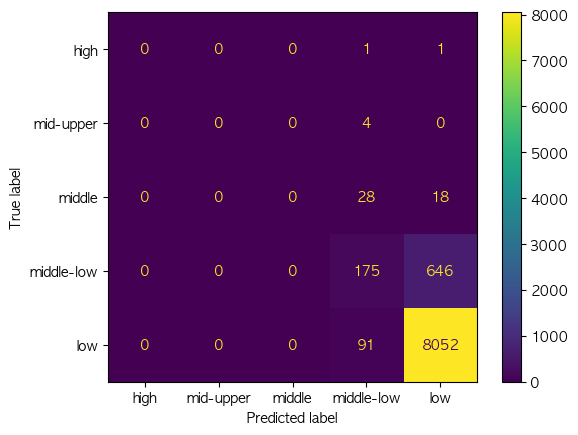

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,
                           display_labels = (['high', 'mid-upper', 'middle', 'middle-low', 'low']))
p.plot()

Accurary(정확도): 예측해서 맞힌 비율

In [23]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = edu_test['사교육비총비용'],
                       y_pred = edu_test['pred'])

0.912488908606921

Precision(정밀도): 관심 클래스를 예측해서 맞힌 비율

In [24]:
metrics.precision_score(y_true = edu_test['사교육비총비용'],
                       y_pred = edu_test['pred'],
                       average = 'weighted')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.8875673849036566

Recall(재현율): 실제 데이터에서 관심 클래스를 찾아낸 비율

In [25]:
metrics.recall_score(y_true = edu_test['사교육비총비용'],
                     y_pred = edu_test['pred'],
                     average = 'weighted')

0.912488908606921

F-score: recall과 precision의 조화평균 / 
target variable의 클래스가 불균형해도 모델의 성능 잘 표현

In [26]:
metrics.f1_score(y_true = edu_test['사교육비총비용'],
                 y_pred = edu_test['pred'],
                                   average = 'weighted')

0.8911303836674698